In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'Customers.csv'  
data = pd.read_csv(file_path)

In [2]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [10]:
regions = data['Region'].value_counts()
print("\nRegion Distribution:\n", regions)


Region Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [5]:
signup_trends = data['SignupDate'].dt.year.value_counts().sort_index()
print("\nYearly Signup Trends:\n", signup_trends)



Yearly Signup Trends:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [6]:
monthly_trends = data['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nMonthly Signup Trends:\n", monthly_trends)


Monthly Signup Trends:
 SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


In [15]:


region_monthly_trends = data.groupby([data['SignupDate'].dt.to_period('M'), 'Region']).size().unstack()
print("\nRegion-Wise Monthly Trends (Last 5 Rows):\n", region_monthly_trends.tail())


Region-Wise Monthly Trends (Last 5 Rows):
 Region      Asia  Europe  North America  South America
SignupDate                                            
2024-08      NaN     1.0            1.0            2.0
2024-09      4.0     1.0            4.0            2.0
2024-10      NaN     NaN            4.0            1.0
2024-11      3.0     4.0            2.0            2.0
2024-12      NaN     1.0            NaN            NaN


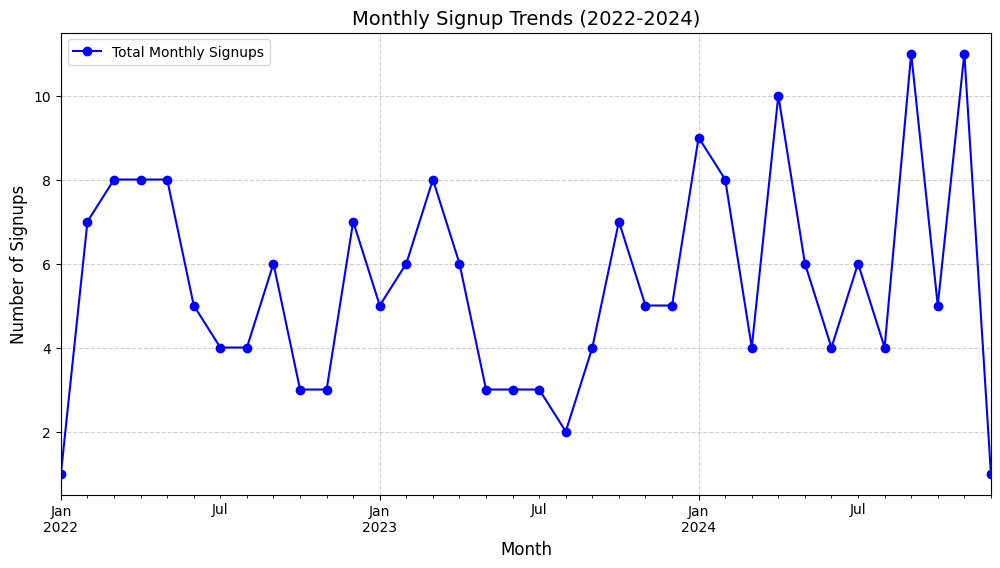

In [8]:
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='blue', label='Total Monthly Signups')
plt.title('Monthly Signup Trends (2022-2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


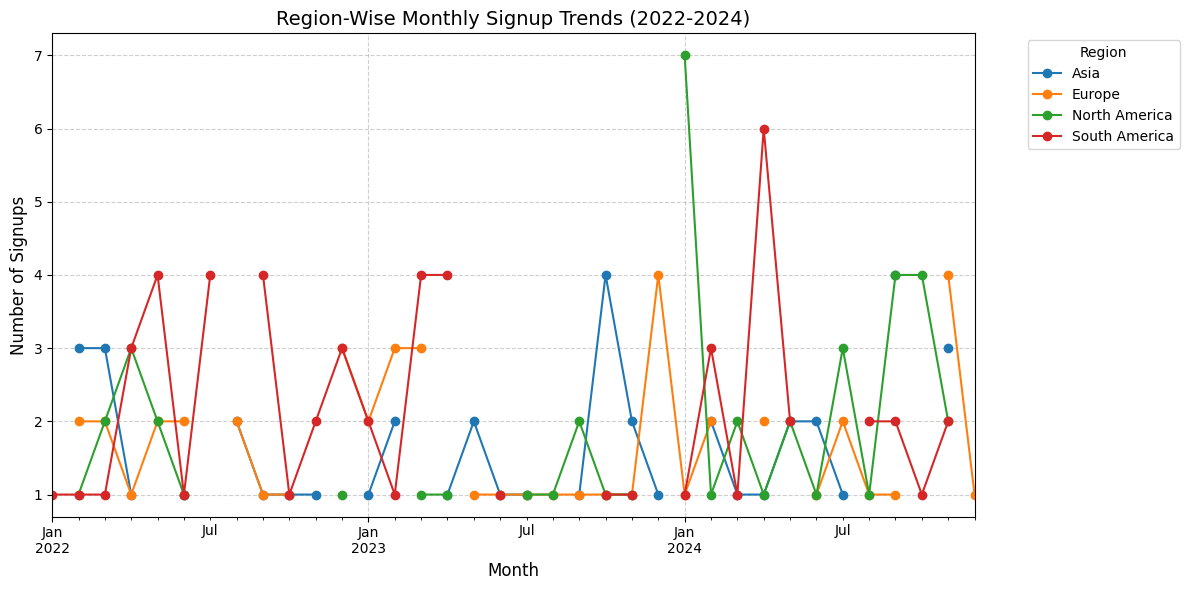

In [9]:
region_monthly_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Region-Wise Monthly Signup Trends (2022-2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()